## Inputs

In [1]:
input_topics = [{"id":"123","covid":True,"topics":[{"weight":0.5, "words":{"topic":0.5, "model":0.2, "statistical":0.1}},{"weight":0.3, "words":{"discovering":0.5, "collection":0.2, "documents":0.1}}]},{"id":"1234","covid":False,"topics":[{"weight":0.6, "words":{"example":0.5, "classify":0.2, "particular":0.1}},{"weight":0.2, "words":{"going":0.5, "apply":0.2, "documents":0.1}}]}]

In [2]:
input_topics

[{'id': '123',
  'covid': True,
  'topics': [{'weight': 0.5,
    'words': {'topic': 0.5, 'model': 0.2, 'statistical': 0.1}},
   {'weight': 0.3,
    'words': {'discovering': 0.5, 'collection': 0.2, 'documents': 0.1}}]},
 {'id': '1234',
  'covid': False,
  'topics': [{'weight': 0.6,
    'words': {'example': 0.5, 'classify': 0.2, 'particular': 0.1}},
   {'weight': 0.2, 'words': {'going': 0.5, 'apply': 0.2, 'documents': 0.1}}]}]

In [3]:
print("No. topics: ", len(input_topics))

No. topics:  2


In [4]:
import pickle

In [74]:
input_topics = pickle.load(open('topic_data_final.pickle','rb'))

In [75]:
len(input_topics)

47110

In [76]:
input_topics[0]

{'id': 0,
 'covid': False,
 'topics': [{'weight': 1.1634114154075126,
   'words': {'gene': 0.024545182,
    'sequenc': 0.012861166,
    'sirna': 0.009538827,
    'genom': 0.008762614,
    'plant': 0.007445867,
    'read': 0.006902695,
    'databas': 0.0068699787,
    'work': 0.0063406695,
    'approach': 0.00630056,
    'cancer': 0.005901881,
    'mirna': 0.0058730505,
    'biolog': 0.0049726246,
    'predict': 0.004728811,
    'dataset': 0.0045554196,
    'annot': 0.004175207,
    'refer': 0.003937205,
    'tool': 0.0038798715,
    'drug': 0.003754207,
    'librari': 0.003688729,
    'enrich': 0.0036044295}},
  {'weight': 2.4722492577409594,
   'words': {'sar': 0.076664254,
    'covid': 0.036889233,
    'mer': 0.0335522,
    'lung': 0.009643259,
    'symptom': 0.008457712,
    'hospit': 0.0072082477,
    'pneumonia': 0.007084416,
    'china': 0.0066704303,
    'ard': 0.005636969,
    'ncov': 0.005274179,
    'outbreak': 0.005072721,
    'preprint': 0.0050100684,
    'imag': 0.00494371

## Install prequisites

In [4]:
#!pip install gensim

In [12]:
import gensim
import numpy as np

In [13]:
from gensim.models import Word2Vec

In [14]:
model = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)

### Simple input

In [31]:
vecs = np.array([])
for topic in input_topics:
    vec = model['topic']
    if len(vecs)==0:
      vecs = vec
    else:
      vecs = np.vstack((vecs, vec))
np.shape(vecs)

(10, 300)

In [98]:
a = np.zeros((3,2))
a[:,0] = [1,2,3]
a

array([[1., 0.],
       [2., 0.],
       [3., 0.]])

### Nested input

In [77]:
n_found = 0
n_notfound = 0
vecs = np.array([])
vecs = np.zeros((len(input_topics),300))
n_tot = 0
for article in input_topics:
    if np.mod(n_tot,1000) == 0:
        print("%i of %i" % (n_tot,len(input_topics)))
    article_vec_sum = np.zeros((300))
    article_weight_sum = 0
    for topic in article['topics']:
        weight_sum = 0
        vec_sum = np.zeros((300))
        for word,weight in topic['words'].items():
            try:
              vec = model[word]
              vec_sum = np.sum((vec_sum, vec* weight),axis=0) 
              weight_sum = weight_sum + weight
              n_found += 1
            except:
              n_notfound += 1            
        article_vec = vec_sum/weight_sum
        #print("Individual")
        #print(topic['weight'])
        #print(article_vec[0:3])
        #print(article_vec_sum[0:3])
        article_vec_sum = np.sum((article_vec_sum,article_vec * topic['weight']),axis=0) 
        article_weight_sum = article_weight_sum + topic['weight']
        #print("Sum")
        #print(article_weight_sum)
        #print(article_vec_sum[0:3])
    #if len(vecs)==0:
    #  vecs = vec
    #else:
    #  vecs = np.vstack((vecs, article_vec_sum/article_weight_sum))
    vecs[n_tot,:] = article_vec_sum/article_weight_sum
    #print(vecs[n_tot,:])
    n_tot += 1
print('Found %i of %i' % (n_found, n_found+n_notfound))

0 of 47110


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


1000 of 47110
2000 of 47110
3000 of 47110
4000 of 47110
5000 of 47110
6000 of 47110
7000 of 47110
8000 of 47110
9000 of 47110
10000 of 47110
11000 of 47110
12000 of 47110
13000 of 47110
14000 of 47110
15000 of 47110
16000 of 47110
17000 of 47110
18000 of 47110
19000 of 47110
20000 of 47110
21000 of 47110
22000 of 47110
23000 of 47110
24000 of 47110
25000 of 47110
26000 of 47110
27000 of 47110
28000 of 47110
29000 of 47110
30000 of 47110
31000 of 47110
32000 of 47110
33000 of 47110
34000 of 47110
35000 of 47110
36000 of 47110
37000 of 47110
38000 of 47110
39000 of 47110
40000 of 47110
41000 of 47110
42000 of 47110
43000 of 47110
44000 of 47110
45000 of 47110
46000 of 47110
47000 of 47110
Found 11541950 of 18844000


## Visualise

In [11]:
#apt-get install libopenblas-dev

In [12]:
!pip install tsne

In [158]:
vecs_t = np.transpose(vecs)

In [159]:
np.shape(vecs)

(47110, 300)

In [160]:
vecs_f64 = np.ndarray.astype(vecs, 'float64')


In [161]:
#!pip install bhtsne

In [162]:
np.shape(vecs_f64)

(47110, 300)

In [163]:
import matplotlib.pyplot as plt

In [164]:
from sklearn.manifold import TSNE

In [165]:
idx = ~np.isnan(vecs_f64).any(axis=1)

In [166]:
vecs_f64 = vecs_f64[idx]
cov_flag = [x['covid'] for x in input_topics]


In [167]:
cov_flag = np.array(cov_flag)[idx]

In [168]:
np.shape([x['covid'] for x in input_topics])

(47110,)

In [169]:
np.shape(vecs_f64)

(47052, 300)

In [170]:
np.shape(cov_flag)

(47052,)

In [171]:
#N_MAX = 5000

In [172]:
#vecs_f64 = vecs_f64[0:N_MAX,:]
#cov_flag = cov_flag[0:N_MAX]

In [173]:
np.shape(vecs_f64)

(47052, 300)

In [174]:
vecs_f64

array([[-0.05024868,  0.08170448,  0.02110182, ...,  0.0177968 ,
         0.0697754 ,  0.05848728],
       [-0.05135356,  0.08219595,  0.02172629, ...,  0.03984557,
         0.09429359,  0.0736663 ],
       [-0.05042505,  0.08678971,  0.02916234, ...,  0.01000016,
         0.10221856,  0.05966458],
       ...,
       [-0.05336563,  0.07456025,  0.02327525, ...,  0.01710727,
         0.06786454,  0.07085019],
       [-0.05104927,  0.06634621,  0.03491185, ..., -0.00076112,
         0.05005506,  0.06330727],
       [-0.04946041,  0.07269277,  0.02689258, ...,  0.02520409,
         0.05806693,  0.06470575]])

In [175]:
tsne_model = TSNE(perplexity=25, n_components=2, n_iter=2500, random_state=1)
tsne_vecs = tsne_model.fit_transform(vecs_f64)

In [176]:
#labels = [x['id'] for x in input_topics]
#col = [x['covid'] for x in input_topics]
col = cov_flag

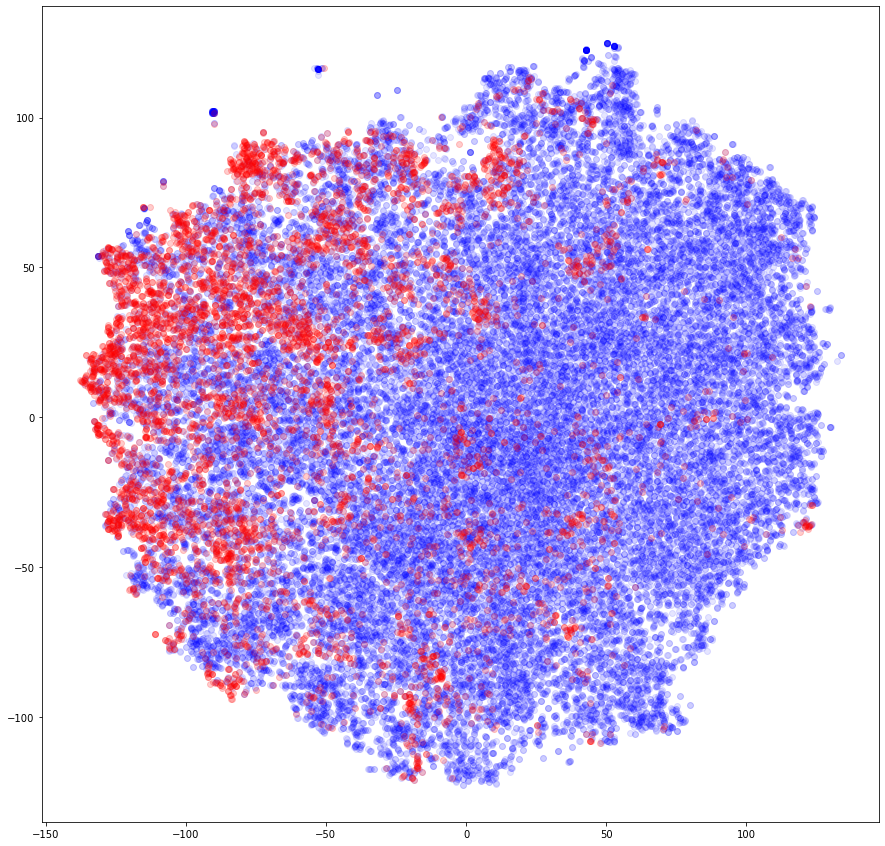

In [182]:
plt.figure(figsize=(15,15))
plt.scatter(tsne_vecs[~cov_flag, 0], tsne_vecs[~cov_flag, 1], c='#0000ff', alpha=0.1)# c=col
plt.scatter(tsne_vecs[cov_flag, 0], tsne_vecs[cov_flag, 1], c='#ff0000', alpha=0.2)# c=col
#for i, txt in enumerate(labels):
#    plt.annotate(txt, (tsne_vecs[i,0], tsne_vecs[i,1]))